In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import missingno as msno

In [8]:
import statsmodels.api as sm

In [9]:
import statistics

In [10]:
from scipy import stats

In [11]:
import pylab

In [12]:
from pylab import rcParams

In [13]:
import sklearn

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn import metrics

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
from sklearn.model_selection import cross_val_score, train_test_split

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.metrics import roc_curve

In [21]:
import warnings
warnings.filterwarnings('ignore')

PART III: DATA PREP

In [22]:
#Reading the csv file into Python
df = pd.read_csv('/Users/CourtneyTaylor/Downloads/churn_clean.csv')

In [23]:
#Quick overview of the data set
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [24]:
#View the columns of the data set
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [25]:
#Dropping columns we will not be using in the analysis
df= df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Email', 'Contacts', 
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [26]:
#Checking for nulls
df.isnull().sum()

Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

<AxesSubplot:>

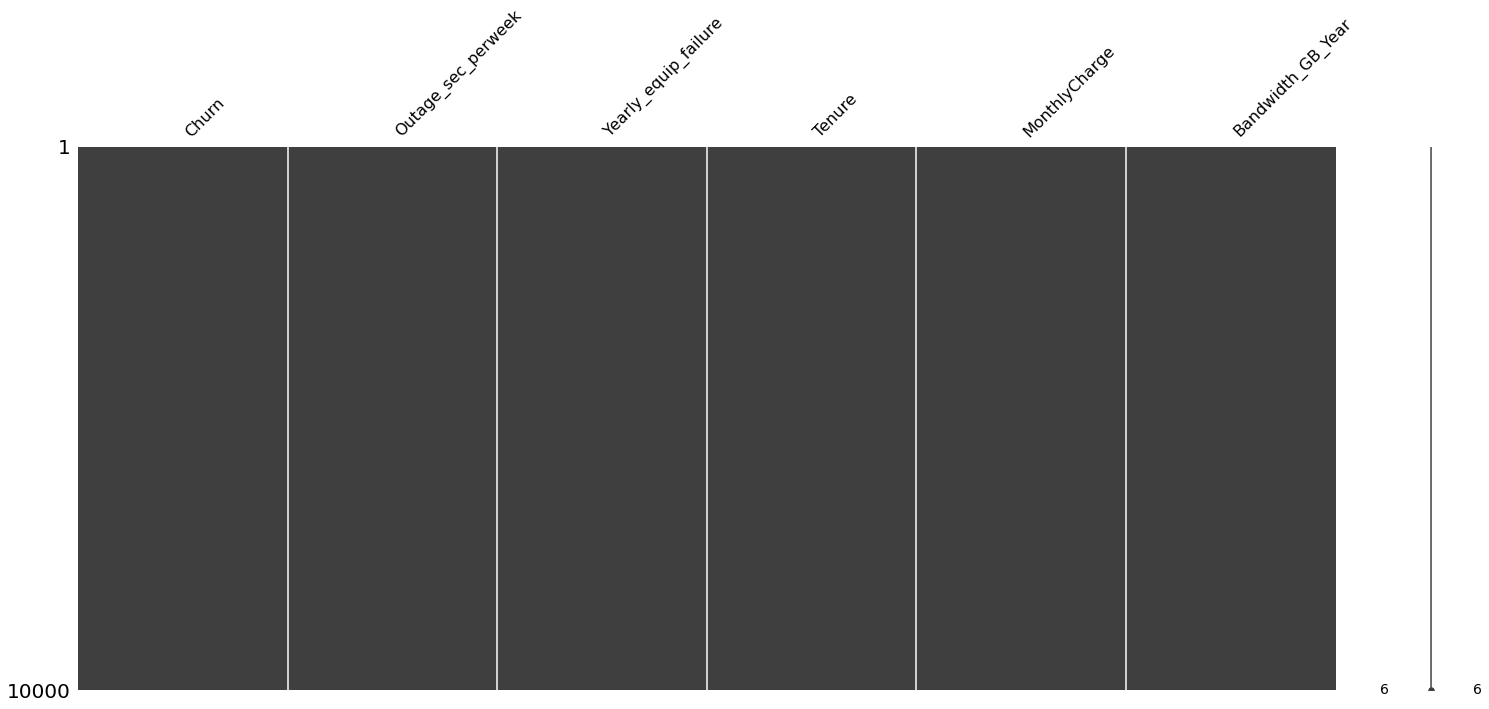

In [27]:
#Visualizing nulls
msno.matrix(df)

In [28]:
#Checking for duplicates
df.duplicated().sum()

0

In [29]:
#Now we will turn all the Yes/No values into dummy values
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [30]:
#Dropping original "Churn" before it was encoded to "DummyChurn"
df = df.drop(columns= ['Churn'])

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

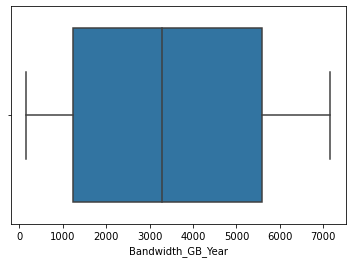

In [31]:
#Checking for outliers
sns.boxplot('Bandwidth_GB_Year', data = df)

<AxesSubplot:xlabel='MonthlyCharge'>

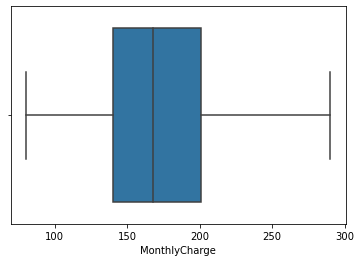

In [32]:
sns.boxplot('MonthlyCharge', data = df)

<AxesSubplot:xlabel='Tenure'>

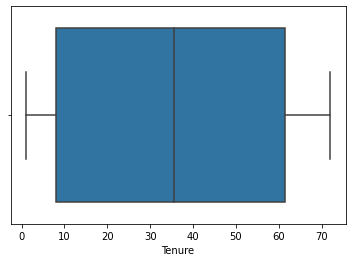

In [33]:
sns.boxplot('Tenure', data = df)

In [34]:
#Extract clean data set
df.to_csv('clean_churn1.csv')

In [35]:
#Load clean data set
clean_churn1 = pd.read_csv('clean_churn1.csv')

PART IV: ANALYSIS

In [36]:
clean_churn1.columns

Index(['Unnamed: 0', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyChurn'],
      dtype='object')

In [37]:
#Drop unnamed column
clean_churn1 = clean_churn1.drop(columns= ['Unnamed: 0'])

In [38]:
#Standardizing data
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clean_churn1pred = clean_churn1.drop('DummyChurn', axis=1)
clean_churn1pred_std = pd.DataFrame(scaler.fit_transform(clean_churn1pred), columns = 
                                    clean_churn1pred.columns)

clean_churn1resp = clean_churn1['DummyChurn']
frames = [clean_churn1resp, clean_churn1pred_std]
clean_churn1_std = pd.concat(frames, axis=1)
print(clean_churn1_std.head())

clean_churn1_std.to_csv('clean_churn1_std.csv')

   DummyChurn  Outage_sec_perweek  Yearly_equip_failure    Tenure  \
0           0           -0.679978              0.946658 -1.048746   
1           1            0.570331              0.946658 -1.262001   
2           0            0.252347              0.946658 -0.709940   
3           0            1.650506             -0.625864 -0.659524   
4           1           -0.623156              0.946658 -1.242551   

   MonthlyCharge  Bandwidth_GB_Year  
0      -0.003943          -1.138487  
1       1.630326          -1.185876  
2      -0.295225          -0.612138  
3      -1.226521          -0.561857  
4      -0.528086          -1.428184  


In [39]:
#Splitting the data
X = clean_churn1.drop(['DummyChurn'], axis = 1)
y = clean_churn1['DummyChurn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.20, random_state = 1, stratify=y)
frames_train = [X_train, y_train]
clean_churn1_train = pd.concat(frames_train, axis = 1)

frames_test = [X_test, y_test]
clean_churn1_test = pd.concat(frames_test, axis = 1)

#Export training & testing files
clean_churn1_train.to_csv('clean_churn1_train.csv')
clean_churn1_test.to_csv('clean_churn1_test.csv')

In [40]:
#Confirm 80% train/20% test split
#This will put equal portions of the target variable into each set of data
print(len(clean_churn1_train))
print(len(clean_churn1_test))
print(clean_churn1_train['DummyChurn'].value_counts())
print(clean_churn1_test['DummyChurn'].value_counts())
print(len(clean_churn1_train[clean_churn1_train['DummyChurn']==0])/len(clean_churn1_train))
print(len(clean_churn1_test[clean_churn1_test['DummyChurn']==0])/len(clean_churn1_test))

8000
2000
0    5880
1    2120
Name: DummyChurn, dtype: int64
0    1470
1     530
Name: DummyChurn, dtype: int64
0.735
0.735


PART V: CREATING KNN

In [41]:
#Create KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.814

In [42]:
#Confusion Matrix
#Classification Report
y_pred = knn.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))

[[1315  155]
 [ 217  313]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1470
           1       0.67      0.59      0.63       530

    accuracy                           0.81      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.81      0.81      0.81      2000



Text(42.0, 0.5, 'Truth')

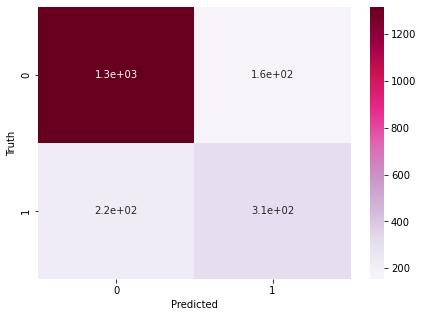

In [43]:
#Using Seaborn for a more visually pleasing confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(matrix, annot=True, cmap = 'PuRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
#Print initial performance matrix
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]
accuracy = (matrix[0,0]+matrix[1,1])/total
print('Accuracy: {}'.format(accuracy))
sensitivity = matrix[1,1]/(matrix[1,1]+matrix[1,0])
print('Sensitivity: {}'.format(sensitivity))
specificity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Specificity: {}'.format(specificity))

Accuracy: 0.814
Sensitivity: 0.590566037735849
Specificity: 0.8945578231292517


In [45]:
#So the initial accuracy score is 81%

In [46]:
#Validating the model &
#Finding the best parameters and score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ('manhattan', 'euclidean', 'minkowski'),
              'weights': ('uniform', 'distance')}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
print('Best parameters: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 47, 'weights': 'distance'}
Best score: 0.8313749999999999


[[1363  107]
 [ 227  303]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1470
           1       0.74      0.57      0.64       530

    accuracy                           0.83      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.83      0.83      0.83      2000

Accuracy: 0.833
Sensitivity: 0.5716981132075472
Specificity: 0.9272108843537415


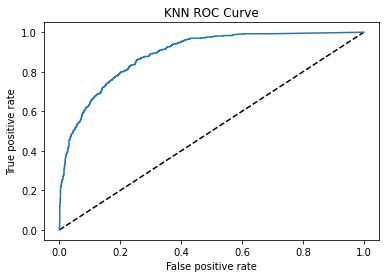

In [47]:
#Final Classification 
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 47, weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Metrics
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))
total = matrix[0,0] + matrix[1,0] + matrix[0,1] + matrix[1,1]

accuracy = (matrix[0,0]+matrix[1,1])/total
print('Accuracy: {}'.format(accuracy))

sensitivity = matrix[1,1]/(matrix[1,1]+matrix[1,0])
print('Sensitivity: {}'.format(sensitivity))

specificity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Specificity: {}'.format(specificity))

y_pred_prob = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label = 'KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC Curve')
plt.show()

In [48]:
#Curve closer to upper left indicates an effective classifier

In [49]:
#AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC:{}'.format(auc))

AUC:0.8894352457964317
